## Mohamed Ali Farag - G10 

## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
train_data = pd.read_csv("RegData.csv", header=None)
train_data = train_data.values

#### Explore your data

In [3]:
print(train_data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
x_input = train_data[:,0]
y_output = train_data[:,1]

#### Explore your data

In [5]:
x_input

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y_output

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

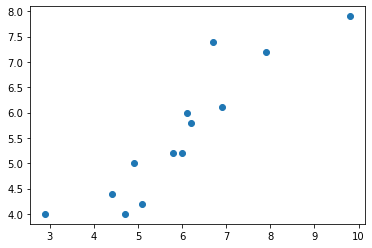

In [7]:
plt.scatter(x_input, y_output)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

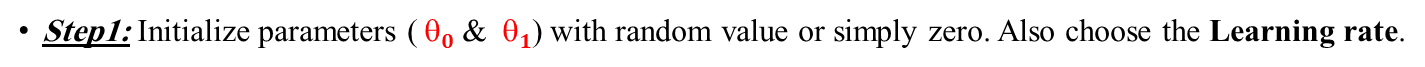

In [8]:
theta_0, theta_1, alpha = 0, 0, 0.01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.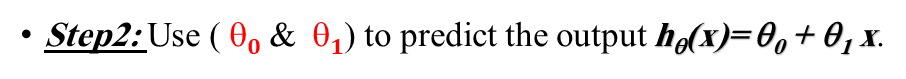
#### Note: you will need to iterate through all data points

In [9]:
hypothesis = theta_0 + theta_1 * x_input
hypothesis

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).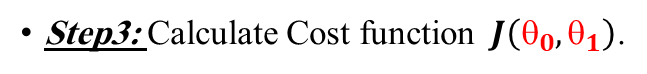
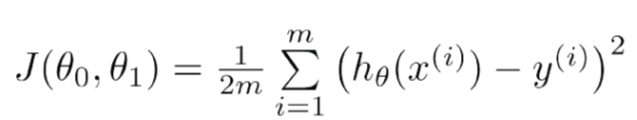

In [10]:
m = len(x_input)
cost_func = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output)) ** 2)
print(cost_func)

16.305384479692314


### Step4: Calculate the gradient.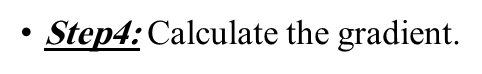
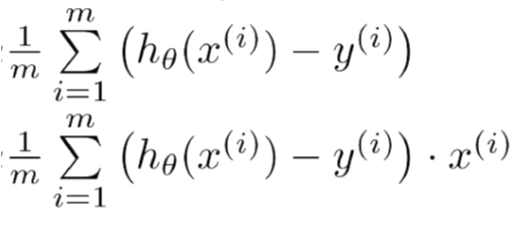

In [11]:
gradients = [(1/m) * np.sum(hypothesis - y_output), (1/m) * np.sum(x_input.dot(hypothesis - y_output))]

In [12]:
gradients

[-5.569230739769231, -35.04384604321538]

### Step5: Update the parameters (simultaneously).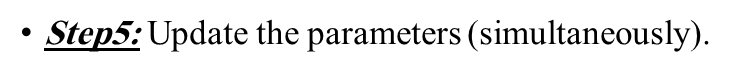
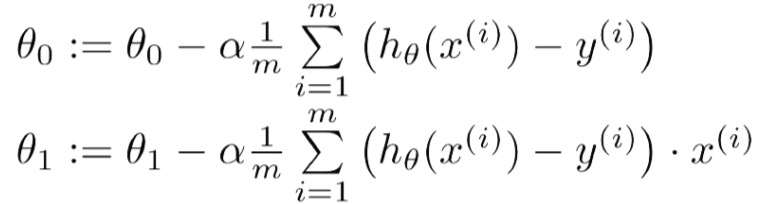

In [13]:
theta_0 = theta_0 - alpha * gradients[0]
theta_1 = theta_1 - alpha * gradients[1]

In [14]:
theta_0

0.05569230739769231

In [15]:
theta_1

0.3504384604321538

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.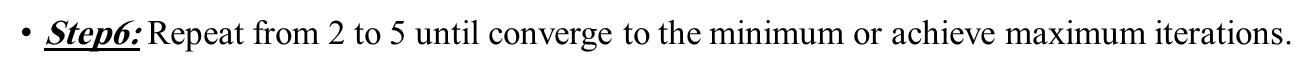

In [16]:
costs = []

In [17]:
 for i in range(1000):
    costs.append(cost_func)
    hypothesis = theta_0 + theta_1 * x_input
    cost_func = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output)) ** 2)
    gradients = [(1/m) * np.sum(hypothesis - y_output), (1/m) * np.sum(x_input.dot(hypothesis - y_output))]
    theta_0 = theta_0 - alpha * gradients[0]
    theta_1 = theta_1 - alpha * gradients[1]

In [18]:
hypothesis

array([3.09505537, 6.11793184, 4.6860431 , 7.07252471, 8.58396314,
       6.27703084, 5.6406356 , 5.72018491, 5.56108628, 4.84514173,
       4.5269441 , 4.28829617, 5.40198766])

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [19]:
y_predict = theta_0 + theta_1 * x_input

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

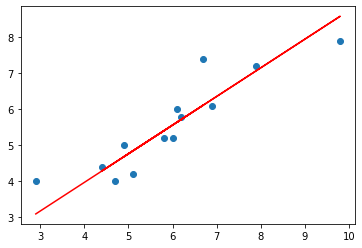

In [20]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predict, 'r')
plt.show()

#### Use R2 score to evaluate LR equation output
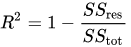
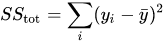
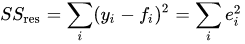
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [21]:
r2_score(y_output, hypothesis)

0.8026968191397711

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [22]:
x_input = train_data[:,0]
y_output = train_data[:,1]
y_output = y_output.reshape(13,1)

In [23]:
x_input_0 = np.ones_like(y_output)
x_input = np.column_stack((x_input_0, x_input))

In [24]:
x_input

array([[1.        , 2.9000001 ],
       [1.        , 6.69999981],
       [1.        , 4.9000001 ],
       [1.        , 7.9000001 ],
       [1.        , 9.80000019],
       [1.        , 6.9000001 ],
       [1.        , 6.0999999 ],
       [1.        , 6.19999981],
       [1.        , 6.        ],
       [1.        , 5.0999999 ],
       [1.        , 4.69999981],
       [1.        , 4.4000001 ],
       [1.        , 5.80000019]])

In [25]:
y_output

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

In [26]:
theta = np.zeros((2, 1)) 
alpha = 0.01
m = len(x_input)

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [27]:
costs = [] 
for i in range(1000):
    hypothesis = x_input@theta 
    print(hypothesis)
    cost_func = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output)) ** 2)
    print("------------")
    costs.append(cost_func)
    gradients = (1/m) * (x_input.T@(hypothesis - y_output))
    theta = theta - alpha * gradients
    print(theta)
    print("************")

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
------------
[[0.05569231]
 [0.35043846]]
************
[[1.07196388]
 [2.40362993]
 [1.7728408 ]
 [2.82415618]
 [3.48998929]
 [2.47371772]
 [2.19336688]
 [2.2284107 ]
 [2.15832307]
 [1.84292842]
 [1.702753  ]
 [1.59762157]
 [2.08823544]]
------------
[[0.08996312]
 [0.56382299]]
************
[[1.72504984]
 [3.86757703]
 [2.85269581]
 [4.54416477]
 [5.6154285 ]
 [3.98034179]
 [3.52928329]
 [3.58566553]
 [3.47290105]
 [2.9654603 ]
 [2.73993105]
 [2.57078432]
 [3.36013656]]
------------
[[0.11118665]
 [0.69373298]]
************
[[2.12301236]
 [4.75919748]
 [3.51047832]
 [5.59167726]
 [6.90976998]
 [4.89794428]
 [4.34295776]
 [4.41233099]
 [4.27358453]
 [3.64922478]
 [3.37173152]
 [3.16361183]
 [4.13483806]]
------------
[[0.12446329]
 [0.77280171]]
************
[[2.36558832]
 [5.30223458]
 [3.91119173]
 [6.22959685]
 [7.69792017]
 [5.45679514]
 [4.83855363]
 [4.91583373]
 [4.76127353]
 [4.06575192]
 [3.75663117

------------
[[0.19384613]
 [0.88837641]]
************
[[2.7701378 ]
 [6.1459679 ]
 [4.54689062]
 [7.21201985]
 [8.89993511]
 [6.32364344]
 [5.61294214]
 [5.7017797 ]
 [5.52410459]
 [4.72456573]
 [4.36921508]
 [4.10270242]
 [5.34642947]]
------------
[[0.19470741]
 [0.8882418 ]]
************
[[2.7706087 ]
 [6.14592727]
 [4.54709229]
 [7.21181768]
 [8.89947718]
 [6.32357589]
 [5.61298228]
 [5.70180637]
 [5.52415818]
 [4.72474048]
 [4.36944368]
 [4.1029714 ]
 [5.34650999]]
------------
[[0.19556809]
 [0.88810728]]
************
[[2.77107928]
 [6.14588667]
 [4.54729383]
 [7.21161565]
 [8.89901956]
 [6.32350838]
 [5.61302239]
 [5.70183303]
 [5.52421174]
 [4.72491511]
 [4.36967212]
 [4.10324019]
 [5.34659046]]
------------
[[0.19642818]
 [0.88797285]]
************
[[2.77154952]
 [6.14584609]
 [4.54749522]
 [7.21141376]
 [8.89856226]
 [6.32344092]
 [5.61306247]
 [5.70185967]
 [5.52426527]
 [4.72508962]
 [4.3699004 ]
 [4.10350879]
 [5.34667087]]
------------
[[0.19728767]
 [0.88783851]]
******

************
[[2.80901905]
 [6.14261297]
 [4.5635423 ]
 [7.19532717]
 [8.86212434]
 [6.31806555]
 [5.61625608]
 [5.70398216]
 [5.52853   ]
 [4.73899446]
 [4.38808972]
 [4.12491149]
 [5.35307784]]
------------
[[0.26577216]
 [0.87713473]]
************
[[2.80946295]
 [6.14257467]
 [4.56373241]
 [7.19513659]
 [8.86169266]
 [6.31800186]
 [5.61629391]
 [5.7040073 ]
 [5.52858053]
 [4.73915919]
 [4.38830521]
 [4.12516504]
 [5.35315375]]
------------
[[0.26658349]
 [0.87700792]]
************
[[2.80990654]
 [6.14253639]
 [4.56392239]
 [7.19494615]
 [8.86126128]
 [6.31793823]
 [5.61633172]
 [5.70403243]
 [5.52863101]
 [4.7393238 ]
 [4.38852055]
 [4.12541843]
 [5.3532296 ]]
------------
[[0.26739426]
 [0.8768812 ]]
************
[[2.81034983]
 [6.14249814]
 [4.56411223]
 [7.19475583]
 [8.8608302 ]
 [6.31787463]
 [5.6163695 ]
 [5.70405754]
 [5.52868147]
 [4.7394883 ]
 [4.38873574]
 [4.12567163]
 [5.3533054 ]]
------------
[[0.26820447]
 [0.87675457]]
************
[[2.8107928 ]
 [6.14245992]
 [4.564

------------
[[0.33276221]
 [0.86666452]]
************
[[2.84608938]
 [6.13941429]
 [4.57941841]
 [7.17941196]
 [8.82607462]
 [6.31274744]
 [5.61941567]
 [5.70608204]
 [5.5327493 ]
 [4.75275115]
 [4.40608526]
 [4.14608616]
 [5.35941656]]
------------
[[0.33352702]
 [0.86654498]]
************
[[2.84650754]
 [6.13937821]
 [4.5795975 ]
 [7.17923243]
 [8.82566798]
 [6.31268746]
 [5.61945131]
 [5.70610572]
 [5.53279689]
 [4.75290633]
 [4.40628825]
 [4.14632501]
 [5.35948806]]
------------
[[0.3342913 ]
 [0.86642553]]
************
[[2.84692541]
 [6.13934216]
 [4.57977646]
 [7.17905303]
 [8.82526161]
 [6.31262751]
 [5.61948692]
 [5.70612939]
 [5.53284445]
 [4.7530614 ]
 [4.40649111]
 [4.1465637 ]
 [5.35955951]]
------------
[[0.33505505]
 [0.86630615]]
************
[[2.84734298]
 [6.13930612]
 [4.57995529]
 [7.17887376]
 [8.82485553]
 [6.3125676 ]
 [5.61952251]
 [5.70615305]
 [5.53289198]
 [4.75321636]
 [4.40669382]
 [4.14680222]
 [5.35963092]]
------------
[[0.33581828]
 [0.86618687]]
******

------------
[[0.39663215]
 [0.85668196]]
************
[[2.88100991]
 [6.13640112]
 [4.59437383]
 [7.16441971]
 [8.79211552]
 [6.30773775]
 [5.62239202]
 [5.70806014]
 [5.53672391]
 [4.76571006]
 [4.4230372 ]
 [4.16603285]
 [5.36538768]]
------------
[[0.39735261]
 [0.85656936]]
************
[[2.88140382]
 [6.13636713]
 [4.59454253]
 [7.1642506 ]
 [8.79173246]
 [6.30768124]
 [5.6224256 ]
 [5.70808245]
 [5.53676874]
 [4.76585624]
 [4.42322842]
 [4.16625785]
 [5.36545503]]
------------
[[0.39807257]
 [0.85645683]]
************
[[2.88179746]
 [6.13633316]
 [4.59471111]
 [7.1640816 ]
 [8.79134966]
 [6.30762477]
 [5.62245915]
 [5.70810475]
 [5.53681354]
 [4.76600232]
 [4.4234195 ]
 [4.1664827 ]
 [5.36552234]]
------------
[[0.39879203]
 [0.85634438]]
************
[[2.88219082]
 [6.13629922]
 [4.59487958]
 [7.16391272]
 [8.79096713]
 [6.30756834]
 [5.62249267]
 [5.70812703]
 [5.53685832]
 [4.76614829]
 [4.42361046]
 [4.16670739]
 [5.3655896 ]]
------------
[[0.39951099]
 [0.85623201]]
******

************
[[2.90868327]
 [6.13401327]
 [4.6062255 ]
 [7.15253886]
 [8.76520406]
 [6.30376774]
 [5.62475068]
 [5.70962771]
 [5.53987365]
 [4.77597957]
 [4.43647104]
 [4.18183994]
 [5.37011959]]
------------
[[0.44793225]
 [0.84866401]]
************
[[2.90905796]
 [6.13398094]
 [4.60638597]
 [7.15237799]
 [8.76483969]
 [6.30371399]
 [5.62478262]
 [5.70964894]
 [5.5399163 ]
 [4.77611861]
 [4.43665293]
 [4.18205397]
 [5.37018366]]
------------
[[0.44861709]
 [0.84855697]]
************
[[2.90943239]
 [6.13394863]
 [4.60654633]
 [7.15221724]
 [8.76447557]
 [6.30366027]
 [5.62481453]
 [5.70967015]
 [5.53995892]
 [4.77625756]
 [4.43683469]
 [4.18226784]
 [5.37024768]]
------------
[[0.44930145]
 [0.84845001]]
************
[[2.90980656]
 [6.13391635]
 [4.60670658]
 [7.1520566 ]
 [8.7641117 ]
 [6.30360659]
 [5.62484642]
 [5.70969134]
 [5.5400015 ]
 [4.77639642]
 [4.43701633]
 [4.18248157]
 [5.37031166]]
------------
[[0.44998533]
 [0.84834312]]
************
[[2.91018047]
 [6.13388409]
 [4.606

------------
[[0.4947401 ]
 [0.84134817]]
************
[[2.93464988]
 [6.1317727 ]
 [4.61734623]
 [7.14139075]
 [8.73995236]
 [6.30004258]
 [5.62696388]
 [5.71109861]
 [5.54282914]
 [4.7856157 ]
 [4.44907635]
 [4.19667214]
 [5.37455967]]
------------
[[0.49539243]
 [0.84124622]]
************
[[2.93500654]
 [6.13174193]
 [4.61749897]
 [7.14123763]
 [8.73960552]
 [6.29999141]
 [5.62699428]
 [5.71111882]
 [5.54286973]
 [4.78574806]
 [4.44924949]
 [4.19687586]
 [5.37462065]]
------------
[[0.4960443 ]
 [0.84114433]]
************
[[2.93536295]
 [6.13171117]
 [4.61765161]
 [7.14108461]
 [8.73925892]
 [6.29994028]
 [5.62702465]
 [5.71113901]
 [5.5429103 ]
 [4.78588032]
 [4.44942251]
 [4.19707945]
 [5.37468159]]
------------
[[0.49669573]
 [0.84104252]]
************
[[2.93571911]
 [6.13168044]
 [4.61780415]
 [7.1409317 ]
 [8.73891257]
 [6.29988918]
 [5.62705501]
 [5.71115918]
 [5.54295084]
 [4.78601249]
 [4.4495954 ]
 [4.19728289]
 [5.37474249]]
------------
[[0.4973467 ]
 [0.84094077]]
******

************
[[2.9730945 ]
 [6.12845544]
 [4.63381091]
 [7.12488553]
 [8.7025662 ]
 [6.29452732]
 [5.6302406 ]
 [5.71327634]
 [5.54720486]
 [4.79988239]
 [4.46773903]
 [4.21863181]
 [5.38113337]]
------------
[[0.56565912]
 [0.83026388]]
************
[[2.97342446]
 [6.12842697]
 [4.63395222]
 [7.12474387]
 [8.70224532]
 [6.29447998]
 [5.63026872]
 [5.71329503]
 [5.54724241]
 [4.80000484]
 [4.46789921]
 [4.21882028]
 [5.38118979]]
------------
[[0.56626221]
 [0.83016962]]
************
[[2.97375419]
 [6.12839852]
 [4.63409344]
 [7.1246023 ]
 [8.70192467]
 [6.29443268]
 [5.63029682]
 [5.71331371]
 [5.54727994]
 [4.8001272 ]
 [4.46805927]
 [4.21900862]
 [5.38124618]]
------------
[[0.56686487]
 [0.83007543]]
************
[[2.97408369]
 [6.12837009]
 [4.63423455]
 [7.12446084]
 [8.70160423]
 [6.29438541]
 [5.63032491]
 [5.71333237]
 [5.54731744]
 [4.80024948]
 [4.46821923]
 [4.21919684]
 [5.38130252]]
------------
[[0.56746711]
 [0.8299813 ]]
************
[[2.97441297]
 [6.12834167]
 [4.634

------------
[[0.60457737]
 [0.82418115]]
************
[[2.99470279]
 [6.12659093]
 [4.64306509]
 [7.11560855]
 [8.68155282]
 [6.2914274 ]
 [5.63208232]
 [5.71450036]
 [5.54966428]
 [4.80790117]
 [4.47822863]
 [4.23097452]
 [5.38482821]]
------------
[[0.60515343]
 [0.82409112]]
************
[[2.99501774]
 [6.12656376]
 [4.64319998]
 [7.11547333]
 [8.68124654]
 [6.29138222]
 [5.63210917]
 [5.7145182 ]
 [5.54970013]
 [4.80801805]
 [4.47838152]
 [4.23115442]
 [5.38488207]]
------------
[[0.60572908]
 [0.82400115]]
************
[[2.99533248]
 [6.1265366 ]
 [4.64333477]
 [7.11533821]
 [8.68094047]
 [6.29133706]
 [5.63213599]
 [5.71453603]
 [5.54973595]
 [4.80813485]
 [4.47853431]
 [4.2313342 ]
 [5.38493588]]
------------
[[0.60630434]
 [0.82391124]]
************
[[2.995647  ]
 [6.12650946]
 [4.64346947]
 [7.11520318]
 [8.68063461]
 [6.29129194]
 [5.6321628 ]
 [5.71455384]
 [5.54977175]
 [4.80825156]
 [4.47868699]
 [4.23151385]
 [5.38498966]]
------------
[[0.60687919]
 [0.82382139]]
******

------------
[[0.65105386]
 [0.81691711]]
************
[[3.02011355]
 [6.12439832]
 [4.65394776]
 [7.10469908]
 [8.65684167]
 [6.28778198]
 [5.63424814]
 [5.71593977]
 [5.5525565 ]
 [4.81733103]
 [4.49056411]
 [4.24548921]
 [5.38917324]]
------------
[[0.65159764]
 [0.81683212]]
************
[[3.02041086]
 [6.12437267]
 [4.65407509]
 [7.10457144]
 [8.65655254]
 [6.28773933]
 [5.63427348]
 [5.71595661]
 [5.55259034]
 [4.81744136]
 [4.49070844]
 [4.24565903]
 [5.38922408]]
------------
[[0.65214105]
 [0.81674719]]
************
[[3.02070796]
 [6.12434703]
 [4.65420233]
 [7.10444389]
 [8.65626362]
 [6.2876967 ]
 [5.6342988 ]
 [5.71597344]
 [5.55262416]
 [4.81755161]
 [4.49085266]
 [4.24582874]
 [5.38927488]]
------------
[[0.65268407]
 [0.81666231]]
************
[[3.02100486]
 [6.12432141]
 [4.65432948]
 [7.10431642]
 [8.6559749 ]
 [6.28765411]
 [5.63432411]
 [5.71599026]
 [5.55265795]
 [4.81766179]
 [4.49099679]
 [4.24599833]
 [5.38932564]]
------------
[[0.65322672]
 [0.8165775 ]]
******

------------
[[0.69389871]
 [0.81022067]]
************
[[3.04353873]
 [6.12237704]
 [4.66398007]
 [7.09464208]
 [8.63406143]
 [6.28442141]
 [5.63624472]
 [5.71726671]
 [5.55522273]
 [4.82602405]
 [4.5019357 ]
 [4.25886973]
 [5.39317875]]
------------
[[0.69441274]
 [0.81014033]]
************
[[3.04381977]
 [6.12235279]
 [4.66410043]
 [7.09452142]
 [8.63378812]
 [6.28438109]
 [5.63626867]
 [5.71728263]
 [5.55525472]
 [4.82612834]
 [4.50207213]
 [4.25903026]
 [5.3932268 ]]
------------
[[0.69492641]
 [0.81006005]]
************
[[3.04410062]
 [6.12232856]
 [4.66422071]
 [7.09440084]
 [8.63351501]
 [6.2843408 ]
 [5.63629261]
 [5.71729854]
 [5.55528668]
 [4.82623256]
 [4.50220847]
 [4.25919068]
 [5.39327483]]
------------
[[0.69543972]
 [0.80997982]]
************
[[3.04438127]
 [6.12230434]
 [4.6643409 ]
 [7.09428035]
 [8.63324208]
 [6.28430054]
 [5.63631653]
 [5.71731443]
 [5.55531862]
 [4.82633671]
 [4.50234471]
 [4.25935099]
 [5.39332282]]
------------
[[0.69595268]
 [0.80989964]]
******

------------
[[0.73391306]
 [0.80396662]]
************
[[3.06541635]
 [6.12048929]
 [4.6733496 ]
 [7.08524947]
 [8.61278614]
 [6.28128285]
 [5.6381094 ]
 [5.71850598]
 [5.55771281]
 [4.83414277]
 [4.51255604]
 [4.27136629]
 [5.39691964]]
------------
[[0.7343993 ]
 [0.80389063]]
************
[[3.0656822 ]
 [6.12046635]
 [4.67346345]
 [7.08513534]
 [8.61252761]
 [6.28124471]
 [5.63813205]
 [5.71852104]
 [5.55774307]
 [4.83424143]
 [4.5126851 ]
 [4.27151814]
 [5.3969651 ]]
------------
[[0.73488521]
 [0.80381468]]
************
[[3.06594786]
 [6.12044343]
 [4.67357723]
 [7.08502128]
 [8.61226926]
 [6.2812066 ]
 [5.6381547 ]
 [5.71853609]
 [5.55777331]
 [4.83434001]
 [4.51281406]
 [4.27166989]
 [5.39701052]]
------------
[[0.73537077]
 [0.80373879]]
************
[[3.06621334]
 [6.12042052]
 [4.67369093]
 [7.0849073 ]
 [8.61201109]
 [6.28116851]
 [5.63817733]
 [5.71855113]
 [5.55780352]
 [4.83443853]
 [4.51294294]
 [4.27182153]
 [5.39705592]]
------------
[[0.735856  ]
 [0.80366295]]
******

------------
[[0.77497731]
 [0.79754849]]
************
[[3.087868  ]
 [6.11855202]
 [4.68296497]
 [7.07561043]
 [8.59095263]
 [6.27806194]
 [5.640023  ]
 [5.71977777]
 [5.56026823]
 [4.84247451]
 [4.52345504]
 [4.28419073]
 [5.40075868]]
------------
[[0.77543503]
 [0.79747695]]
************
[[3.08811825]
 [6.11853042]
 [4.68307215]
 [7.07550298]
 [8.59070926]
 [6.27802604]
 [5.64004433]
 [5.71979195]
 [5.56029671]
 [4.84256738]
 [4.52357653]
 [4.28433367]
 [5.40080147]]
------------
[[0.77589244]
 [0.79740546]]
************
[[3.08836834]
 [6.11850884]
 [4.68317925]
 [7.07539562]
 [8.59046606]
 [6.27799016]
 [5.64006565]
 [5.71980611]
 [5.56032518]
 [4.84266019]
 [4.52369793]
 [4.28447652]
 [5.40084424]]
------------
[[0.77634953]
 [0.79733401]]
************
[[3.08861825]
 [6.11848728]
 [4.68328628]
 [7.07528832]
 [8.59022303]
 [6.27795431]
 [5.64008695]
 [5.71982027]
 [5.56035362]
 [4.84275293]
 [4.52381925]
 [4.28461927]
 [5.40088697]]
------------
[[0.7768063 ]
 [0.79726262]]
******

In [28]:
hypothesis

array([[3.09480993],
       [6.11795302],
       [4.68593799],
       [7.07263008],
       [8.58420182],
       [6.27706605],
       [5.64061468],
       [5.720171  ],
       [5.56105835],
       [4.84505065],
       [4.52682496],
       [4.28815597],
       [5.40194569]])

In [29]:
r2_score(y_output, hypothesis)

0.8026709330593267

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

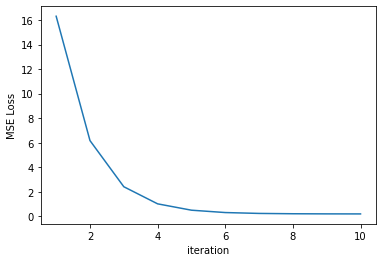

In [30]:
plt.plot(np.linspace(1, 10, num = 10),costs[:10])
plt.xlabel("iteration")
plt.ylabel("MSE Loss")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [31]:
train_data_multiple = pd.read_csv("MultipleLR.csv", header=None)
train_data_multiple = train_data_multiple.values

In [32]:
y_output = train_data_multiple[:,3]
y_output = y_output.reshape(25,1)

In [33]:
x_input_0 = np.ones_like(y_output)
x_input = np.column_stack((x_input_0, train_data_multiple[:, :3]))

In [34]:
x_input

array([[  1,  73,  80,  75],
       [  1,  93,  88,  93],
       [  1,  89,  91,  90],
       [  1,  96,  98, 100],
       [  1,  73,  66,  70],
       [  1,  53,  46,  55],
       [  1,  69,  74,  77],
       [  1,  47,  56,  60],
       [  1,  87,  79,  90],
       [  1,  79,  70,  88],
       [  1,  69,  70,  73],
       [  1,  70,  65,  74],
       [  1,  93,  95,  91],
       [  1,  79,  80,  73],
       [  1,  70,  73,  78],
       [  1,  93,  89,  96],
       [  1,  78,  75,  68],
       [  1,  81,  90,  93],
       [  1,  88,  92,  86],
       [  1,  78,  83,  77],
       [  1,  82,  86,  90],
       [  1,  86,  82,  89],
       [  1,  78,  83,  85],
       [  1,  76,  83,  71],
       [  1,  96,  93,  95]])

In [35]:
y_output

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]])

### Repeat your implementation but for more than one variable

In [36]:
theta = np.array([[0], [0], [0], [0]])
alpha = 0.0001

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [37]:
hypothesis = x_input@theta

### Plot loss vs. iterations

In [38]:
m = len(x_input)

In [39]:
costs = [] 
for i in range(100):
    hypothesis = x_input@theta 
    print(hypothesis)
    cost_func = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output)) ** 2)
    print("------------")
    costs.append(cost_func)
    gradients = (1/m) * (x_input.T@(hypothesis - y_output))
    theta = theta - alpha * gradients
    print(theta)
    print("************")


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
------------
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
************
[[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [341.507404]
 [340.132136]
 [325.599384]
 [304.130312]
 [375.750104]]
------------
[[0.0006489 ]
 [0.05184957]
 [0.05202407]
 [0.0558825 ]]
************
[[12.13878065]
 [14.59784964]
 [14.37887606]
 [15.66481653]
 [11.13103119]
 [ 8.21532086]
 [11.73100293]
 [ 8.70387659]
 [13.65088807]
 [12.65610986]
 [11.29937666]
 [11.14698839]
 [14.85025313]
 [12.33811311]
 [11.78671093]
 [14.8175212 ]
 [11.7467307 ]
 [14.07970288]
 [14.15552057]
 [12.66586573]
 [13.75580869]
 [13.69922821]
 [13.1129257 ]
 [12.2268716 ]
 [15.

------------
[[0.00881266]
 [0.69802738]
 [0.6996223 ]
 [0.79149331]]
************
[[166.29659315]
 [200.10099864]
 [197.0332761 ]
 [214.7317569 ]
 [152.54441445]
 [112.71902132]
 [160.88973647]
 [119.48454655]
 [187.24175377]
 [173.77794744]
 [154.92527405]
 [152.91668325]
 [203.41536811]
 [168.90177082]
 [161.67963485]
 [203.17510086]
 [160.74816541]
 [193.12391469]
 [193.86889779]
 [173.46858356]
 [188.64897295]
 [187.85109997]
 [179.80053001]
 [167.32356896]
 [207.27617888]]
------------
[[0.00748888]
 [0.59101193]
 [0.59199939]
 [0.68251448]]
************
[[141.69989643]
 [170.54139065]
 [167.90579768]
 [183.01202166]
 [129.99933259]
 [ 96.10138912]
 [137.14888133]
 [101.88788383]
 [159.61978115]
 [148.19866228]
 [132.05082587]
 [130.36435532]
 [173.32035743]
 [143.88093904]
 [137.83040835]
 [173.18093347]
 [136.91735778]
 [164.63324631]
 [165.17672724]
 [147.79598318]
 [160.80871725]
 [160.12225292]
 [153.25609899]
 [142.51887247]
 [176.63945233]]
------------
[[0.00875444]
 [0.6

In [40]:
hypothesis

array([[156.28243975],
       [188.18685114],
       [185.2244262 ],
       [201.95418482],
       [143.41958323],
       [106.13416764],
       [151.41470875],
       [112.58177368],
       [176.23700644],
       [163.77957831],
       [145.74750052],
       [143.95288415],
       [191.13209325],
       [158.57989806],
       [152.18846849],
       [191.15306927],
       [150.85474204],
       [181.77729044],
       [182.12654236],
       [162.96386654],
       [177.52593597],
       [176.74743475],
       [169.16153081],
       [157.03332688],
       [194.87017452]])

#### Use R2 score to evaluate LR equation output

In [41]:
r2_score(y_output, hypothesis)

0.9679211293123436

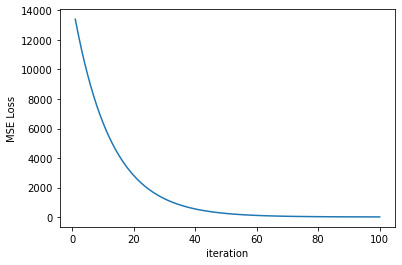

In [42]:
plt.plot(np.linspace(1, 100, num = 100),costs)
plt.xlabel("iteration")
plt.ylabel("MSE Loss")
plt.show()

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
train_data = pd.read_csv("RegData.csv", header=None)
train_data = train_data.values

In [45]:
x_input = train_data[:,0]
x_input = x_input.reshape(-1, 1)
y_output = train_data[:,1]

#### Train the model (fit the model to the training data)

In [46]:
reg_model = LinearRegression()
reg_model.fit(x_input, y_output)

LinearRegression()

#### Predict y values using the trained model

In [47]:
y_predict = reg_model.predict(x_input)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

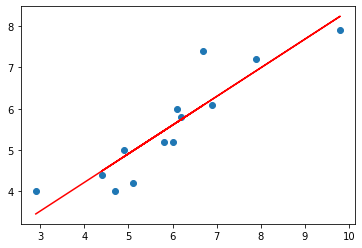

In [48]:
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predict, 'r')
plt.show()

#### Use R2 score to evaluate model output

In [49]:
reg_model.score(x_input, y_output)

0.8213156778363777

In [50]:
r2_score(y_output, y_predict)

0.8213156778363777

### Repeat for Mulivariate

In [51]:
train_data_multiple = pd.read_csv("MultipleLR.csv", header=None)
train_data_multiple = train_data_multiple.values

In [52]:
y_output = train_data_multiple[:,3]
y_output = y_output.reshape(25,1)

In [53]:
x_input_0 = np.ones_like(y_output)
x_input = np.column_stack((x_input_0, train_data_multiple[:, :3]))

In [54]:
reg_model = LinearRegression()
reg_model.fit(x_input, y_output)

LinearRegression()

In [55]:
y_predict = reg_model.predict(x_input)

In [56]:
reg_model.score(x_input, y_output)

0.9896615789448399

In [57]:
r2_score(y_output, y_predict)

0.9896615789448399